In [1]:
import superblockify as sb
import shapely
import pandas as pd
import seaborn as sns
import scipy
import geopandas as gpd

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


2025-05-02 11:31:16,277 |     INFO | __init__.py:11 | superblockify version 99.0.1


In [2]:
df_cities = pd.read_json("../data/processed/city_partners_public/metadata_cities.json")
df_cities

,Cities,Area,Number of edges,Total road length,Road density,Total estimated population,Population density
0,Amsterdam,197.310440,29363,2773.695725,14.057521,1.116148e+06,5656.812950
1,Southwark,29.935407,9642,754.803041,25.214391,6.546476e+05,21868.672965
2,Vilnius,393.538646,18395,3474.021407,8.827650,9.697433e+05,2464.162799
3,Milan_Municipality,181.755362,25361,2525.412978,13.894572,1.717573e+06,9449.916510
4,Vratsa,15.643470,2619,268.839684,17.185426,4.688643e+04,2997.188369
5,Braga,55.123125,9834,967.107288,17.544493,2.009707e+05,3645.851553
6,Westminster,22.048690,7452,570.219287,25.861821,4.653211e+05,21104.249344
7,Riga,304.120728,23467,2962.878031,9.742440,9.981629e+05,3282.127131
8,Kozani,4.664904,3785,200.506345,42.981881,4.303159e+04,9224.538858
9,Zaragoza,46.546535,9008,783.128039,16.824626,6.429889e+05,13813.894527


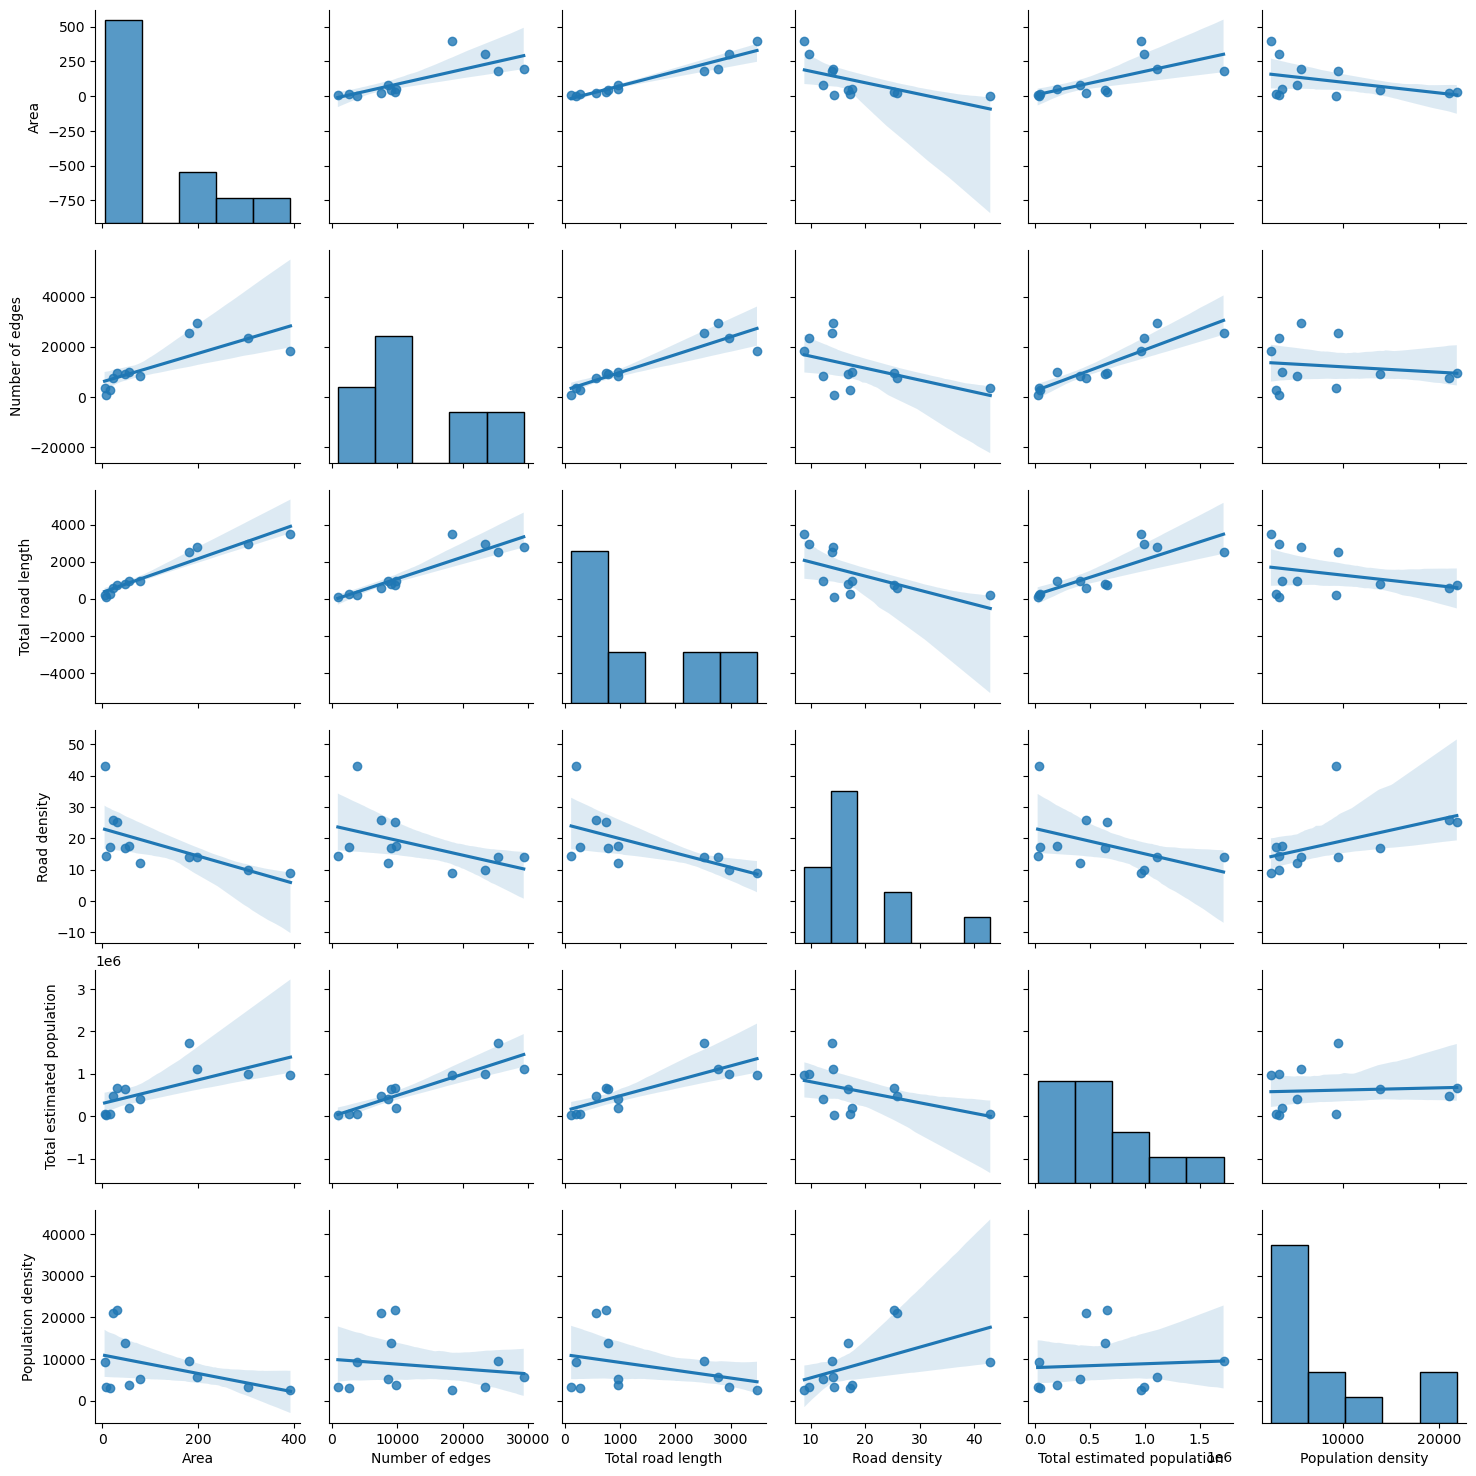

In [3]:
sns.pairplot(df_cities, kind="reg", diag_kind="hist");

In [4]:
df_filt = df_cities[df_cities["Road density"] < 40]

In [5]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Road density"], df_filt["Population density"]
)
print(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    df_filt["Area"], df_filt["Road density"]
)
print(r_value)

0.8456822102993697
-0.7119070329732073


In [6]:
df_res_filt = pd.read_json(
    "../data/processed/city_partners_public/results_cities_residential_filt.json"
)
df_res_filt

,Cities,Amount of superblocks,Share of streets within superblocks,Share of the population within superblocks,Area of pacified streets,Average travel distance increase,Maximal detour
0,Amsterdam,305,40.4,50.9,30.9,1.35158,1.5
1,Braga,87,40.6,49.4,37.6,4.58719,1.8
2,Cugir,5,35.2,37.0,31.1,0.95603,0.7
3,Haifa,92,37.3,50.9,38.5,1.78073,2.4
4,Kozani,25,45.6,47.7,42.8,7.90380,1.2
5,Milan_Municipality,253,29.4,41.3,27.2,3.16681,4.1
6,Riga,234,38.7,44.0,25.7,1.30775,3.8
7,Southwark,102,48.3,52.0,41.6,2.29982,2.8
8,Vilnius,149,21.7,27.0,15.5,0.85785,6.1
9,Vratsa,10,42.9,36.0,31.7,4.04766,0.9


In [7]:
df_bet_filt = pd.read_json(
    "../data/processed/city_partners_public/results_cities_betweenness_filt.json"
)
df_bet_filt

,Cities,Amount of superblocks,Share of streets within superblocks,Share of the population within superblocks,Area of pacified streets,Average travel distance increase,Maximal detour,Share of non-residential streets in superblocks
0,Amsterdam,179,39.3,49.2,32.2,2.62464,12.3,23.5
1,Braga,54,24.7,46.9,18.9,3.62067,1.5,9.7
2,Cugir,6,17.9,16.9,13.7,3.94181,0.9,14.3
3,Haifa,47,18.1,21.7,19.7,3.61109,8.6,12.1
4,Kozani,8,19.8,24.3,19.9,3.79308,1.2,11.3
5,Milan_Municipality,73,15.6,19.4,12.3,2.77152,3.9,10.4
6,Riga,162,31.7,34.6,23.0,1.41602,3.8,28.2
7,Southwark,90,51.0,56.1,45.3,2.81127,1.9,31.2
8,Vilnius,114,20.3,21.1,14.8,0.85510,1.8,9.3
9,Vratsa,10,24.7,18.9,18.4,0.93070,1.1,3.0


In [8]:
mean_sb = []
mean_ss = []
for city in df_cities["Cities"].values:
    gdf = gpd.read_file(
        f"../data/processed/city_partners_public/graphs_SB/{city}/{city}_betweenness.gpkg",
        layer="edges",
    )
    mean_sb.append(
        round(
            float(
                100
                * sum(
                    gdf[
                        (gdf["betweenness_percentile"] == 1)
                        & (gdf["highway"].isin(["residential", "living_street"]))
                    ]["length"].values
                )
                / sum(
                    gdf[(gdf["highway"].isin(["residential", "living_street"]))][
                        "length"
                    ].values
                )
            ),
            1,
        )
    )
    mean_ss.append(
        round(
            float(
                100
                * sum(
                    gdf[gdf["highway"].isin(["residential", "living_street"])][
                        "length"
                    ].values
                )
                / sum(gdf["length"].values)
            ),
            1,
        )
    )
print(round(sum(mean_sb) / len(mean_sb), 1), round(sum(mean_ss) / len(mean_ss), 1))

2.8 61.7


In [9]:
G = sb.utils.load_graphml_dtypes(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/sb_results/Amsterdam_betweenness/Amsterdam_filt.graphml"
)

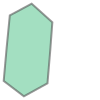

In [10]:
shapely.from_wkt(G.edges[(6316199, 46379627, 0)]["cell"])

In [11]:
partitions_df = pd.read_json(
    "../data/processed/city_partners_public/graphs_SB/Amsterdam/sb_results/Amsterdam_betweenness/filt_partitions.json"
)
partitions_df

,name,value,m,n,length_total,ignore,representative_node_id,mean_edge_betweenness_normal,mean_edge_betweenness_length,mean_edge_betweenness_linear,...,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,street_orientation_order
0,residential_2,2,6,6,594.894661,False,2311089625,0.000137,0.000098,0.020088,...,562.924879,5,112.584976,1.120109,0.000000,217.140913,180.950760,21529.328256,20372.337000,0.915414
1,residential_3,3,160,95,14410.715876,False,46357388,0.000413,0.000376,0.079167,...,11583.440532,121,95.730913,1.024943,0.000000,165.507350,149.827706,25106.098897,20180.468900,0.838263
2,residential_4,4,82,48,7547.782091,False,46339795,0.000209,0.000177,0.036819,...,6315.061549,63,100.239072,1.035467,0.015873,180.663050,180.663050,28408.444499,23768.714221,0.831101
3,residential_5,5,234,135,18494.980579,False,46426758,0.000579,0.000541,0.139802,...,16621.193446,197,84.371540,1.020934,0.000000,230.360639,230.360639,31559.374347,28361.990640,0.500513
4,residential_7,7,56,31,3491.000250,False,46385452,0.000500,0.000460,0.123256,...,2400.504226,36,66.680673,1.046537,0.000000,157.803588,106.899205,17770.721432,12219.618688,0.828706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,residential_366,366,34,17,2989.808267,False,1511600054,0.000335,0.000301,0.092558,...,1519.585146,18,84.421397,1.213389,0.000000,124.815269,80.762821,21951.395523,11156.907600,0.501060
175,residential_381,381,5,6,274.251241,False,292914491,0.000094,0.000063,0.008420,...,274.251241,5,54.850248,2.729335,0.000000,93.791490,93.791490,4287.072086,4287.072086,0.915414
176,residential_402,402,13,7,1263.642823,False,12484781098,0.000192,0.000156,0.041259,...,839.359191,7,119.908456,1.532704,0.000000,82.150757,58.679112,14829.887874,9850.570482,0.873356
177,residential_421,421,10,6,1253.488363,False,7332549064,0.000113,0.000082,0.016602,...,626.744182,5,125.348836,1.219693,0.000000,102.372778,68.248519,21387.181064,10693.590532,0.915414


In [12]:
G.nodes

NodeView((6316199, 46379627, 46389218, 25658579, 1334338691, 26203121, 2311089467, 494157307, 26206556, 46348430, 916874958, 26371846, 46341915, 331526066, 26371856, 46339660, 46334837, 26585460, 46410991, 26586128, 154528006, 5828012924, 26596415, 46377905, 27219290, 46311966, 275265354, 469250875, 46309787, 27471866, 46367002, 46369688, 27471867, 46374203, 46371409, 27561854, 46311177, 6948848809, 46312772, 28265319, 6933084583, 29529317, 12496251385, 46360122, 30118443, 46419339, 30118467, 5859267005, 30138383, 158694434, 102837532, 8881939204, 30154649, 46337019, 30154650, 46337942, 30167794, 481290959, 30210570, 46249143, 30210617, 30731909, 30731914, 46304906, 46298484, 30813410, 301663836, 31008901, 7638757821, 46483027, 31240616, 46359871, 46369747, 31240619, 46356347, 46363752, 31240665, 46336500, 31240668, 46338006, 31240666, 9404576657, 46332065, 46327179, 31296271, 46343533, 46349435, 46155454, 46201103, 46165829, 46166922, 591103781, 46173879, 46170100, 46176802, 898811409